### Imports 

In [ ]:
!pip install plotly
!pip install pygam
!pip install datapane

In [ ]:
#Load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datapane as dp
import pygam
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

path = 'sbj_1_I.csv' # enter your path to the dataset here!

### Load Data

In [ ]:
df = pd.read_csv(path)

df.head(3)

,time,Power,Oxygen,Cadence,HR,RF
0,1,0.0,318.400000,0,75.600000,20.100000
1,2,0.0,356.166667,0,75.666667,19.750000
2,3,0.0,403.285714,0,75.714286,19.428571


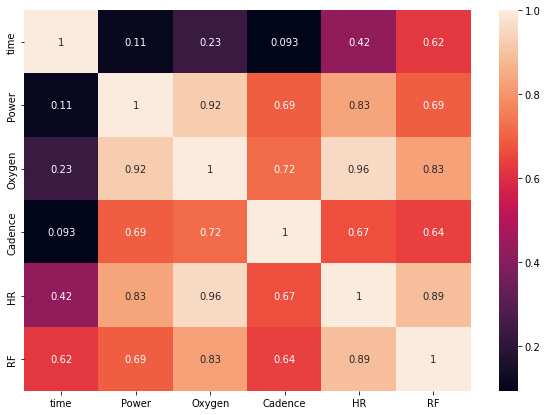

In [ ]:
fig,ax = plt.subplots(figsize=(10,7))
sns.heatmap(df.corr(),annot=True);

In [ ]:
median_df = df[['Power','Oxygen']].groupby('Power').median().reset_index()

In [ ]:
plot = px.scatter(data_frame=median_df,
                  x='Power',
                  y='Oxygen',
                  title='Oxygen uptake Per unit power input')
plot.data[0].update(mode='markers+lines')
plot.update_layout(xaxis={'dtick':1},showlegend=True)
plot

In [ ]:

median_df = df[['Power','Oxygen']].groupby('Power').median().reset_index()

### Linear Regression

In [ ]:
model=LinearRegression()
model.fit(median_df[['Power']],median_df['Oxygen'])
median_df['Linear Regression'] = model.predict(median_df[['Power']])

plot = px.scatter(data_frame=median_df,
                  x='Power',
                  y=['Oxygen','Linear Regression'],title='Oxygen uptake Per unit inpout power')

plot.data[0].update(mode='markers+lines')
plot.data[1].update(mode='markers+lines')
plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.3,y=-.3))
plot

In [ ]:
poly = PolynomialFeatures(30)
poly_df = pd.DataFrame(poly.fit_transform(median_df[['Power']]),columns = poly.get_feature_names())
poly_df.head(2)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



,1,x0,x0^2,x0^3,x0^4,x0^5,x0^6,x0^7,x0^8,x0^9,...,x0^21,x0^22,x0^23,x0^24,x0^25,x0^26,x0^27,x0^28,x0^29,x0^30
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1.0,5.0,25.0,125.0,625.0,3125.0,15625.0,78125.0,390625.0,1953125.0,...,4.768372e+14,2.384186e+15,1.192093e+16,5.960464e+16,2.980232e+17,1.490116e+18,7.450581e+18,3.725290e+19,1.862645e+20,9.313226e+20


In [ ]:
vals = [1,3,5,10]
vals_col = []

In [ ]:
for val in vals:
    n = val
    end = median_df.shape[0]-2

    model=LinearRegression()
    model.fit(poly_df.iloc[:end,:n+1],median_df['Oxygen'][:end])
    median_df[f'x^{n}'] = model.predict(poly.transform(median_df[['Power']])[:,:n+1])
    vals_col.append(f'x^{n}')

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



In [ ]:
plot = px.scatter(data_frame=median_df,
                  x='Power',
                  y=['Oxygen']+vals_col,
                 title='Polynomial Regression on Oxygen intake Per unit input Power')

for i in plot.data:
    i.update(mode='markers+lines')

plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.3,y=-.3))
plot.update_yaxes(range=[0,9500])
plot


### GAM

In [ ]:
median_df.head()

,Power,Oxygen,Linear Regression,x^1,x^3,x^5,x^10
0,0.0,517.375,820.339260,826.129591,620.068376,1136.975345,1122.264179
1,5.0,305.150,865.772067,871.307896,699.685903,1019.322384,1122.264211
2,6.7,1999.300,881.219221,886.668520,726.190111,986.861343,1122.264356
3,15.0,336.950,956.637681,961.664507,851.591257,877.444112,1122.283956
4,20.1,2071.500,1002.979143,1007.746379,925.450275,846.033061,1122.370535


In [ ]:
from pygam import GAM, LinearGAM, s, f, te

In [ ]:
lams = np.logspace(-5,5,20)

In [ ]:
end = median_df.shape[0]-2
splines = 12

In [ ]:
#gam2 = GAM(s(0),n_splines=6,link='log').gridsearch(median_df[['Power']].iloc[:end].values,median_df['Oxygen'][:end].values,lam=lams)

In [ ]:
gam = LinearGAM(s(0,n_splines=splines)).gridsearch(median_df[['Power']].iloc[:end].values,
                                               median_df['Oxygen'][:end].values,
                                               lam=lams)

100% (20 of 20) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


In [ ]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                      2.0013
Link Function:                     IdentityLink Log Likelihood:                                 -1036.0691
Number of Samples:                           72 AIC:                                             2078.1408
                                                AICc:                                            2078.4941
                                                GCV:                                           745717.9844
                                                Scale:                                         708503.1252
                                                Pseudo R-Squared:                                   0.5626
Feature Function                  Lam

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning:

KNOWN BUG: p-values computed in this summary are likely much smaller than they should be. 
 
Please do not make inferences based on these values! 

Collaborate on a solution, and stay up to date at: 
github.com/dswah/pyGAM/issues/163 




In [ ]:
median_df[f'GAM {splines} splines'] = gam.predict(median_df[['Power']])

In [ ]:
plot = px.scatter(data_frame=median_df,
                  x='Power',
                  y=['Oxygen',f'GAM {splines} splines'],
                 title=f'GAM {splines} splines on Oxygen  uptake Per unit input Power')

for i in plot.data:
    i.update(mode='markers+lines')

plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.3,y=-.3))
plot.update_yaxes(range=[0,6500])
plot

### Exploring Splines

In [ ]:
coefs = gam.coef_

In [ ]:
matrix = pd.DataFrame(gam._modelmat(median_df[['Power']].iloc[:end].values).toarray())

In [ ]:
matrix.shape

(72, 13)

In [ ]:
plot = px.scatter(data_frame=matrix,
                  x= matrix.index,
                  y= matrix.columns,
                 title=f'Spline Functions for {splines} spline GAM')

for i in plot.data:
    i.update(mode='lines')

plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.52,y=-.3))
plot


In [ ]:
scaled_matrix = matrix*coefs

In [ ]:
plot = px.scatter(data_frame=scaled_matrix,
                  x= scaled_matrix.index,
                  y= scaled_matrix.columns,
                 title=f'Spline Functions * Coefficients for {splines} spline GAM')

for i in plot.data:
    i.update(mode='lines')

plot.update_layout(xaxis={'dtick':1},showlegend=True,
                   legend=dict(
                                orientation="h",
                                yanchor="bottom",
                                xanchor="right",x=.52,y=-.3))
plot

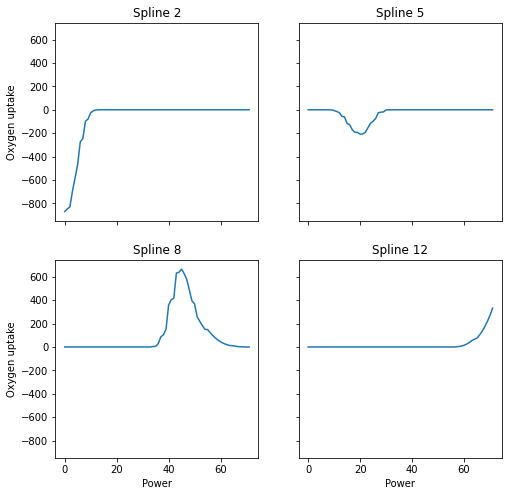

In [ ]:
fig, ax = plt.subplots(ncols=2,nrows=2, figsize = (8,8),sharey=True, sharex=True)
(matrix*coefs)[1].plot(title = 'Spline 2', ax=ax[0,0])
(matrix*coefs)[4].plot(title = 'Spline 5', ax=ax[0,1])
(matrix*coefs)[8].plot(title = 'Spline 8', ax=ax[1,0])
(matrix*coefs)[11].plot(title = 'Spline 12', ax=ax[1,1])
plt.setp(ax[-1, :], xlabel='Power')
plt.setp(ax[:, 0], ylabel='Oxygen uptake')
plt.show()